# TPM of target genes 

## Add section to config

In [1]:
#function
append_section_to_ini <- function(ini_file, new_section) {
    if (is.list(new_section)) {
        ini <- ini::read.ini(ini_file)
        ini <- c(ini,new_section)
        ini::write.ini(x=ini, filepath=ini_file)
    } else {
        print('new_section is not a list')
    }
}

#list of key-value pairs
TPM_TARGETS <- list(dir='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/tpm_targets', 
                plots='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/tpm_targets/plots',
                bin='/data/hodges_lab/ATAC-STARR_B-cells/bin_human-evolution/cis+trans_region-charaterization/traget_gene_tpm.ipynb')

#list of section, resulting in list of list.
new_section <- list(TPM_TARGETS=TPM_TARGETS)

#write ini
append_section_to_ini("../config.ini", new_section)

## Assign genes to regions

In [1]:
# R kernel
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(magrittr))
suppressPackageStartupMessages(library(ChIPseeker))
suppressPackageStartupMessages(library(TxDb.Hsapiens.UCSC.hg38.knownGene))

ini <- ini::read.ini("../config.ini")

In [2]:
my_function <- function(peak) {
    ChIPseeker::annotatePeak(peak, tssRegion = c(-2000, 1000), 
                 TxDb = TxDb.Hsapiens.UCSC.hg38.knownGene,
                 level = "gene",
                 assignGenomicAnnotation = TRUE,
                 addFlankGeneInfo = TRUE)
}

In [3]:
hh_cis <- my_function(ini$CIS_TRANS$`hh-active_mm-inactive_cis-only`)
hh_trans <- my_function(ini$CIS_TRANS$`hh-active_mm-inactive_trans-only`)
hh_cis_trans <- my_function(ini$CIS_TRANS$`hh-active_mm-inactive_cis+trans`)
mm_cis <- my_function(ini$CIS_TRANS$`mm-active_hh-inactive_cis-only`)
mm_trans <- my_function(ini$CIS_TRANS$`mm-active_hh-inactive_trans-only`)
mm_cis_trans <- my_function(ini$CIS_TRANS$`mm-active_hh-inactive_cis+trans`)

>> loading peak file...				 2022-09-20 10:29:47 AM 
>> preparing features information...		 2022-09-20 10:29:47 AM 


  1655 genes were dropped because they have exons located on both strands
  of the same reference sequence or on more than one reference sequence,
  so cannot be represented by a single genomic range.
  Use 'single.strand.genes.only=FALSE' to get all the genes in a
  GRangesList object, or use suppressMessages() to suppress this message.



>> identifying nearest features...		 2022-09-20 10:29:58 AM 
>> calculating distance from peak to TSS...	 2022-09-20 10:29:58 AM 
>> assigning genomic annotation...		 2022-09-20 10:29:58 AM 
>> adding flank feature information from peaks...	 2022-09-20 10:31:45 AM 
>> assigning chromosome lengths			 2022-09-20 10:31:46 AM 
>> done...					 2022-09-20 10:31:46 AM 
>> loading peak file...				 2022-09-20 10:31:46 AM 
>> preparing features information...		 2022-09-20 10:31:46 AM 
>> identifying nearest features...		 2022-09-20 10:31:46 AM 
>> calculating distance from peak to TSS...	 2022-09-20 10:31:46 AM 
>> assigning genomic annotation...		 2022-09-20 10:31:46 AM 
>> adding flank feature information from peaks...	 2022-09-20 10:31:55 AM 
>> assigning chromosome lengths			 2022-09-20 10:31:55 AM 
>> done...					 2022-09-20 10:31:55 AM 
>> loading peak file...				 2022-09-20 10:31:55 AM 
>> preparing features information...		 2022-09-20 10:31:55 AM 
>> identifying nearest features...		 202

## Extract gene targets

In [4]:
hh_cis <- as.data.frame(hh_cis)$geneId
mm_cis <- as.data.frame(mm_cis)$geneId
hh_trans <- as.data.frame(hh_trans)$geneId
mm_trans <- as.data.frame(mm_trans)$geneId
hh_cis_trans <- as.data.frame(hh_cis_trans)$geneId
mm_cis_trans <- as.data.frame(mm_cis_trans)$geneId

In [5]:
suppressPackageStartupMessages(library(org.Hs.eg.db))

#get ensembl id
hh_cis %<>% clusterProfiler::bitr(OrgDb = org.Hs.eg.db, toType = "ENSEMBL", fromType = "ENTREZID")
hh_trans %<>% clusterProfiler::bitr(OrgDb = org.Hs.eg.db, toType = "ENSEMBL", fromType = "ENTREZID")
hh_cis_trans %<>% clusterProfiler::bitr(OrgDb = org.Hs.eg.db, toType = "ENSEMBL", fromType = "ENTREZID")
mm_cis %<>% clusterProfiler::bitr(OrgDb = org.Hs.eg.db, toType = "ENSEMBL", fromType = "ENTREZID")
mm_trans %<>% clusterProfiler::bitr(OrgDb = org.Hs.eg.db, toType = "ENSEMBL", fromType = "ENTREZID")
mm_cis_trans %<>% clusterProfiler::bitr(OrgDb = org.Hs.eg.db, toType = "ENSEMBL", fromType = "ENTREZID")

'select()' returned 1:many mapping between keys and columns

Warning message in clusterProfiler::bitr(., OrgDb = org.Hs.eg.db, toType = "ENSEMBL", :
“8.04% of input gene IDs are fail to map...”
'select()' returned 1:many mapping between keys and columns

Warning message in clusterProfiler::bitr(., OrgDb = org.Hs.eg.db, toType = "ENSEMBL", :
“9.89% of input gene IDs are fail to map...”
'select()' returned 1:many mapping between keys and columns

Warning message in clusterProfiler::bitr(., OrgDb = org.Hs.eg.db, toType = "ENSEMBL", :
“9.04% of input gene IDs are fail to map...”
'select()' returned 1:many mapping between keys and columns

Warning message in clusterProfiler::bitr(., OrgDb = org.Hs.eg.db, toType = "ENSEMBL", :
“9.91% of input gene IDs are fail to map...”
'select()' returned 1:many mapping between keys and columns

Warning message in clusterProfiler::bitr(., OrgDb = org.Hs.eg.db, toType = "ENSEMBL", :
“8.37% of input gene IDs are fail to map...”
'select()' returned 1:many map

## Merge tpm scores to genes

In [6]:
tpm <- read_tsv("/data/hodges_lab/ATAC-STARR_B-cells/data/RNA-seq/GM12878+LCL8664_TPM-normalized_counts.tsv", col_names = TRUE)

Rows: 26781 Columns: 6

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): gene_id, SYMBOL
dbl (4): TPM_G1, TPM_G2, TPM_L1, TPM_L2


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [7]:
hh_cis %<>% inner_join(tpm, by = c("ENSEMBL" = "gene_id")) %>% 
    transmute(SYMBOL, TPM_G1, TPM_G2, TPM_mean_G = (TPM_G1+TPM_G2)/2, TPM_L1, TPM_L2, TPM_mean_L = (TPM_L1+TPM_L2)/2, category = "cis only")
hh_trans %<>% inner_join(tpm, by = c("ENSEMBL" = "gene_id")) %>% 
    transmute(SYMBOL, TPM_G1, TPM_G2, TPM_mean_G = (TPM_G1+TPM_G2)/2, TPM_L1, TPM_L2, TPM_mean_L = (TPM_L1+TPM_L2)/2, category = "trans only")
hh_cis_trans %<>% inner_join(tpm, by = c("ENSEMBL" = "gene_id")) %>% 
    transmute(SYMBOL, TPM_G1, TPM_G2, TPM_mean_G = (TPM_G1+TPM_G2)/2, TPM_L1, TPM_L2, TPM_mean_L = (TPM_L1+TPM_L2)/2, category = "cis & trans")
hh <- bind_rows(hh_cis, hh_trans, hh_cis_trans) %>% mutate(species = "Human-Biased Active")

In [8]:
mm_cis %<>% inner_join(tpm, by = c("ENSEMBL" = "gene_id")) %>% 
    transmute(SYMBOL, TPM_G1, TPM_G2, TPM_mean_G = (TPM_G1+TPM_G2)/2, TPM_L1, TPM_L2, TPM_mean_L = (TPM_L1+TPM_L2)/2, category = "cis only")
mm_trans %<>% inner_join(tpm, by = c("ENSEMBL" = "gene_id")) %>% 
    transmute(SYMBOL, TPM_G1, TPM_G2, TPM_mean_G = (TPM_G1+TPM_G2)/2, TPM_L1, TPM_L2, TPM_mean_L = (TPM_L1+TPM_L2)/2, category = "trans only")
mm_cis_trans %<>% inner_join(tpm, by = c("ENSEMBL" = "gene_id")) %>% 
    transmute(SYMBOL, TPM_G1, TPM_G2, TPM_mean_G = (TPM_G1+TPM_G2)/2, TPM_L1, TPM_L2, TPM_mean_L = (TPM_L1+TPM_L2)/2, category = "cis & trans")
mm <- bind_rows(mm_cis, mm_trans, mm_cis_trans) %>% mutate(species = "Macaque-Biased Active")

In [9]:
all <- bind_rows(hh, mm)

## Plot

In [10]:
p <- ggplot(all, aes(x = category, y = log10(TPM_mean_G/TPM_mean_L), fill = category)) +
    geom_boxplot(outlier.alpha = 0.25) +
    geom_violin(alpha = 0.25) +
    facet_grid(.~species) +
    scale_fill_brewer(palette = "Blues") +
    labs(y = "log10 Human/Macaque TPM of nearest neighbor gene") +
    theme_bw(base_size = 8) +
    theme(legend.position = "none", axis.title.x = element_blank()) 

Warning message:
“Removed 754 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 754 rows containing non-finite values (stat_ydensity).”


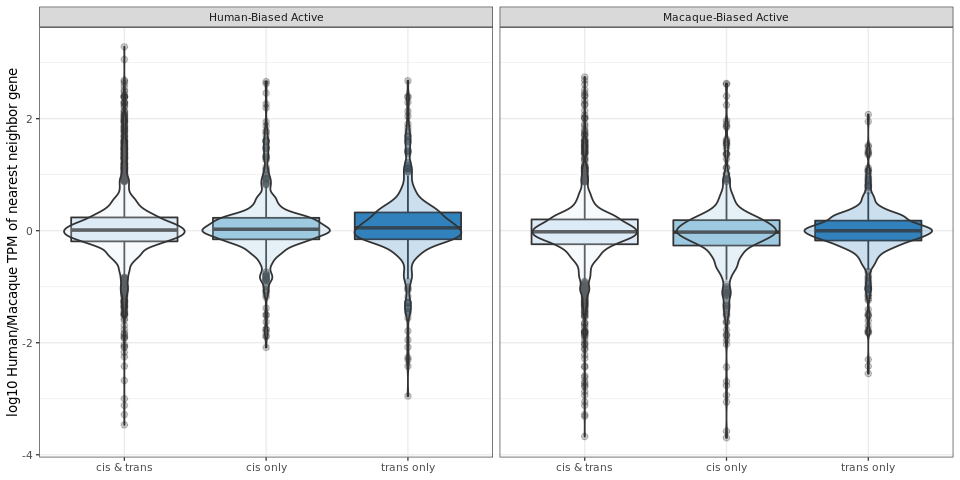

In [11]:
options(repr.plot.width = 8, repr.plot.height = 4)
p

In [12]:
ggsave(p, filename = paste0(ini$TPM_TARGETS$plots, "/differential_expression_boxplots.pdf"), device = cairo_pdf, width = 4, height = 2)

Warning message:
“Removed 754 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 754 rows containing non-finite values (stat_ydensity).”
